### Analyzing Amazon Sales Data

##### Objective
The objective of this project is to analyze Amazon sales data to understand sales trends, identify key metrics, and uncover meaningful relationships between attributes. This analysis aims to provide insights that can help improve sales management, reduce costs, and increase profits in a competitive market environment.

In [1]:
#importing necessary libary
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib Inline

In [2]:
sales_org = pd.read_csv('Amazon Sales data.csv')
sales_org.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
sales_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


#### Data dictionary

The dataset contains the following columns:

1. Region: Geographical region where the sales were made.
2. Country: Country where the sales were made.
3. Item Type: Type of item sold (e.g., Electronics, Clothing).
4. Sales Channel: Channel through which the sale was made (e.g., Online, Offline).
5. Order Priority: Priority level of the order (e.g., High, Medium, Low, Critical).
6. Order Date: Date when the order was placed.
7. Order ID: Unique identifier for the order.
8. Ship Date: Date when the order was shipped.
9. Units Sold: Number of units sold.
10. Unit Price: Price per unit of the item sold.
11. Unit Cost: Cost per unit of the item sold.
12. Total Revenue: Total revenue generated from the sale (Units Sold * Unit Price).
13. Total Cost: Total cost incurred for the sale (Units Sold * Unit Cost).
14. Total Profit: Total profit made from the sale (Total Revenue - Total Cost).


- From the information above we can see that there is Zero null values in all the columns.
- We can see the data type are not correct for the columns `Order Date`  and `Ship Date`

In [4]:
sales_df = sales_org.copy() #Creating the copy of the original dataset to work with.

In [5]:
#Changeing data type of `Order data` and `Ship data` to data format.
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

In [6]:
#Updateing the column `Order Priority` values to full forms
# C : Critical, H : High, M : Medium, L : Low

priority_map  = {'H': "High",
                'L': 'Low',
                'M': 'Medium',
                'C': 'Critical'}

sales_df['Order Priority'] = sales_df['Order Priority'].map(priority_map)
sales_df['Order Priority'].value_counts()

Order Priority
High        30
Low         27
Critical    22
Medium      21
Name: count, dtype: int64

In [7]:
#Dropping the `Order ID` column, since it store unique ID's of that order alone as no use.
sales_df.drop(['Order ID'], axis = 1, inplace = True)

In [8]:
#Checking for duplicate row in the dataset.
duplicate_row = sales_df.duplicated().sum()
duplicate_row

0

- Now `Duplicate record` found in the data set.

##### Summarize  each coluumns

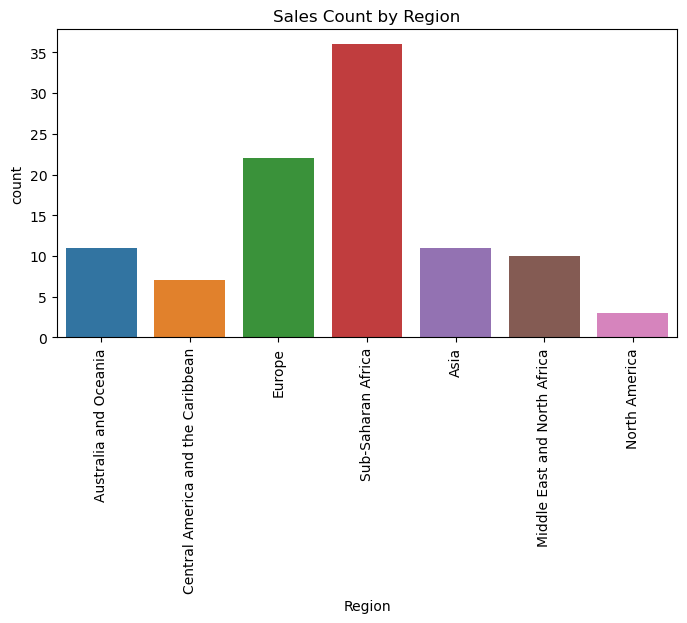

Distribution of Sales by Region:
Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(data=sales_df, x='Region')
plt.xticks(rotation=90)
plt.title('Sales Count by Region')
plt.show()

print("Distribution of Sales by Region:")
print(sales_df['Region'].value_counts())

- Most order's were done from region `Sub-Saharan Africa` and the least `North America`

In [10]:
unqiue_country = sales_df['Country'].unique()

for country in unqiue_country:
    print(country)

Tuvalu
Grenada
Russia
Sao Tome and Principe
Rwanda
Solomon Islands
Angola
Burkina Faso
Republic of the Congo
Senegal
Kyrgyzstan
Cape Verde
Bangladesh
Honduras
Mongolia
Bulgaria
Sri Lanka
Cameroon
Turkmenistan
East Timor
Norway
Portugal
New Zealand
Moldova 
France
Kiribati
Mali
The Gambia
Switzerland
South Sudan
Australia
Myanmar
Djibouti
Costa Rica
Syria
Brunei
Niger
Azerbaijan
Slovakia
Comoros
Iceland
Macedonia
Mauritania
Albania
Lesotho
Saudi Arabia
Sierra Leone
Cote d'Ivoire
Fiji
Austria
United Kingdom
San Marino
Libya
Haiti
Gabon
Belize
Lithuania
Madagascar
Democratic Republic of the Congo
Pakistan
Mexico
Federated States of Micronesia
Laos
Monaco
Samoa 
Spain
Lebanon
Iran
Zambia
Kenya
Kuwait
Slovenia
Romania
Nicaragua
Malaysia
Mozambique


- Checked for the spelling it seems all are good to go.

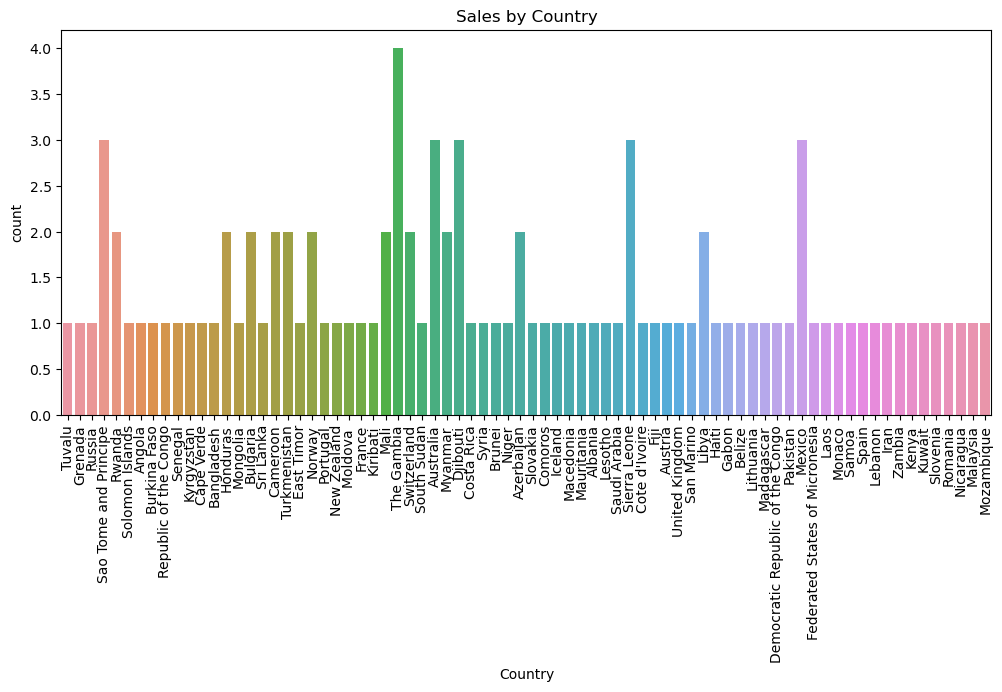

Distribution of sales by Country
Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64


In [11]:
plt.figure(figsize = (12,5))
sns.countplot(data = sales_df, x = 'Country')
plt.title("Sales by Country")
plt.xticks(rotation = 90)
plt.show()

print("Distribution of sales by Country")
print(sales_df['Country'].value_counts())

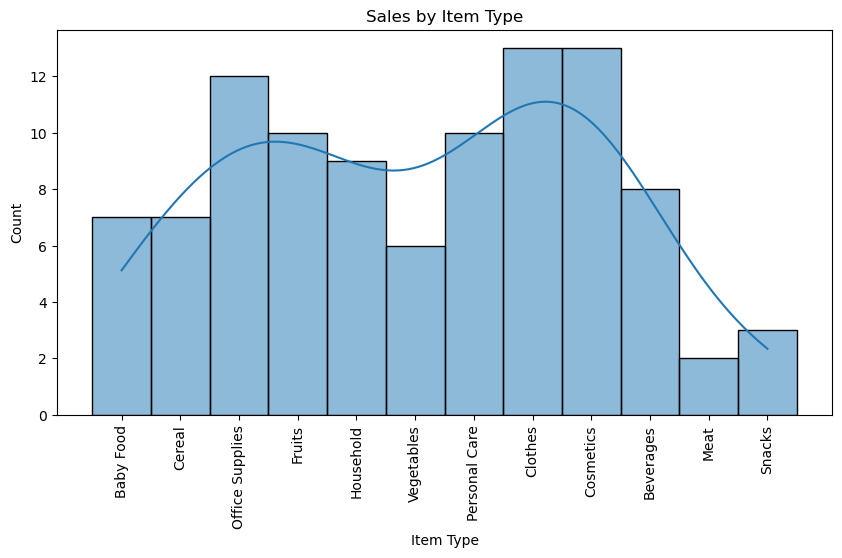

Distribution of sales
Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64


In [12]:
plt.figure(figsize = (10,5))
sns.histplot(data=sales_df['Item Type'], kde= True)
plt.title("Sales by Item Type")
plt.xticks(rotation =90)
plt.show()

print("Distribution of sales")
print(sales_df['Item Type'].value_counts())

- More added were placed on the Personal use on items `Clothes` and `Cosmrtics`.

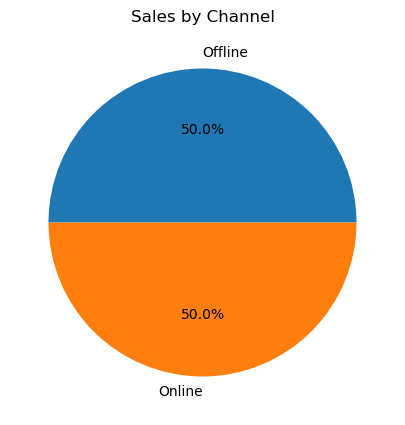

Distribution of sales by Channel
Sales Channel
Offline    50
Online     50
Name: count, dtype: int64


In [13]:
# Creating the pie chart
plt.figure(figsize=(10, 5))
plt.pie(sales_df['Sales Channel'].value_counts(), labels=sales_df['Sales Channel'].value_counts().index, autopct='%1.1f%%')
plt.title("Sales by Channel")
plt.show()

# Printing the distribution of sales by channel
print("Distribution of sales by Channel")
print(sales_df['Sales Channel'].value_counts())

In [14]:
#Summarize the numeric columns
numeric_columns = sales_df.select_dtypes(['int', 'float'])
numeric_columns.describe() #Summaring the numeric columns

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


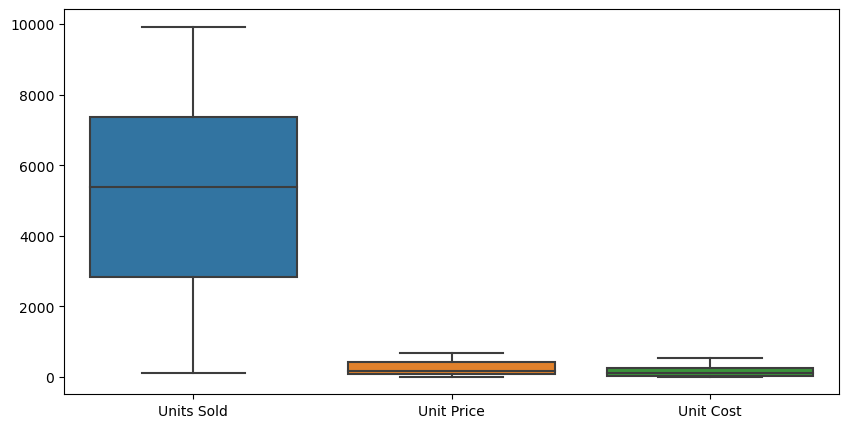

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_columns.iloc[:, :3])
plt.show()

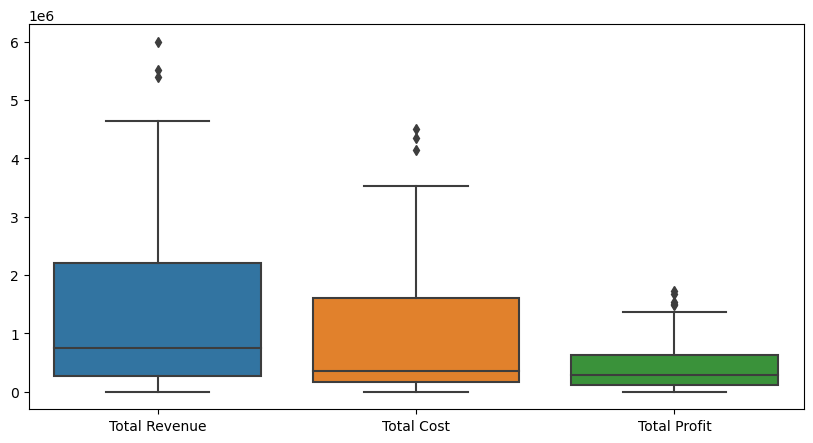

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_columns.iloc[:, 3:])
plt.show()

In [17]:
from scipy import stats

z_score = np.abs(stats.zscore(numeric_columns))

# Identify outliers
outliers = (z_score > 3).any(axis=1)

# Extract the outlier rows
outlier_data = sales_df[outliers]

print(f'Number of Outliers: {outlier_data.shape[0]}')
outlier_data.head()

Number of Outliers: 2


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
13,Central America and the Caribbean,Honduras,Household,Offline,High,2017-02-08,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02
68,Europe,Lithuania,Office Supplies,Offline,High,2010-10-24,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75


- It seems the outliers are geniune and relevant, and should be kept with dataset.

In [18]:
sales_df['Sales Year'] = sales_df['Order Date'].dt.year
sales_df['Sales Month'] = sales_df['Order Date'].dt.month

In [19]:
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sales Year,Sales Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [20]:
sales_df['Sales Month'].value_counts()

Sales Month
2     13
7     12
5     11
10    11
6     10
4      9
11     9
1      7
12     5
9      5
8      4
3      4
Name: count, dtype: int64

In [21]:
sales_df['Sales Year'].value_counts()

Sales Year
2012    22
2014    15
2013    12
2011    12
2015    11
2010    10
2016    10
2017     8
Name: count, dtype: int64

In [22]:
sales_df.groupby(['Sales Year'])['Sales Month'].sum()

Sales Year
2010     75
2011     79
2012    118
2013     84
2014    100
2015     63
2016     83
2017     24
Name: Sales Month, dtype: int32

In [23]:
sales_df[sales_df['Unit Price'] <= sales_df['Unit Cost']]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sales Year,Sales Month


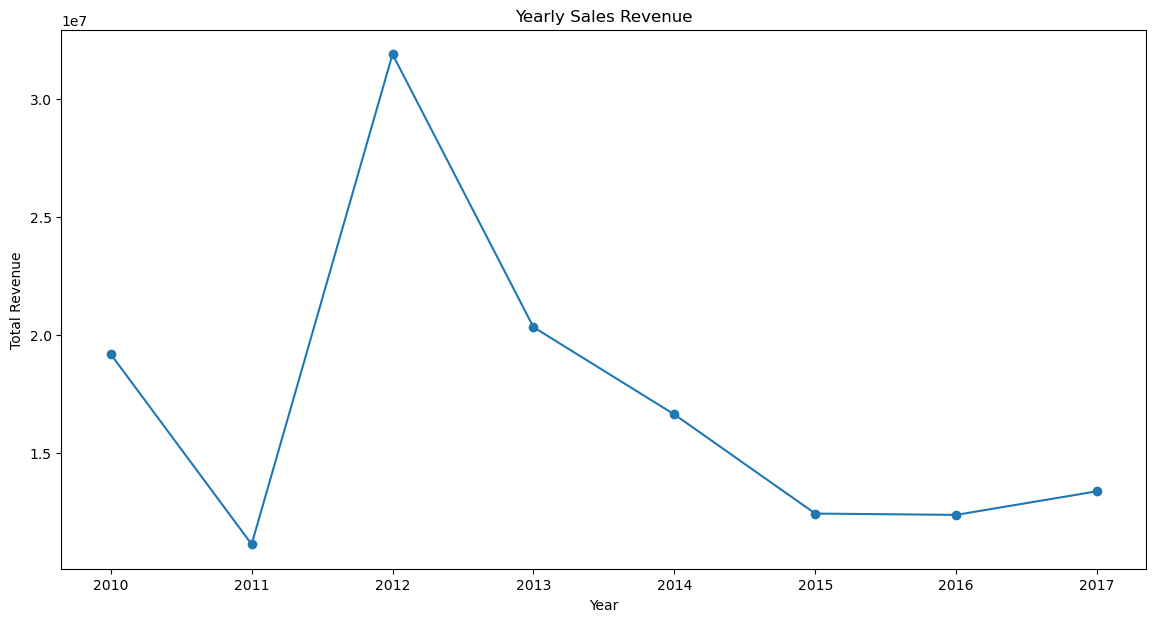

Sales Year
2012    31898644.52
2013    20330448.66
2010    19186024.92
2014    16630214.43
2017    13373419.63
2015    12427982.86
2016    12372867.22
2011    11129166.07
Name: Total Revenue, dtype: float64


In [24]:
# Sales over time
plt.figure(figsize=(14, 7))
sales_df.groupby('Sales Year')['Total Revenue'].sum().plot(kind='line', marker='o')
plt.title('Yearly Sales Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.show()

print(sales_df.groupby('Sales Year')['Total Revenue'].sum().sort_values(ascending=False))

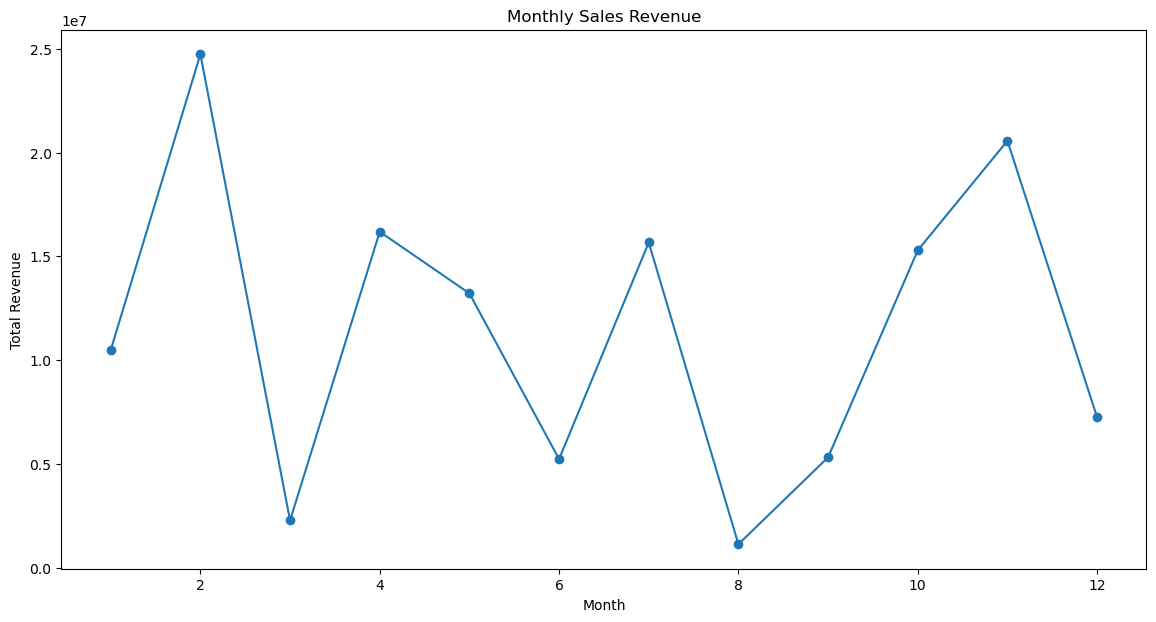

Sales Month
2     24740517.77
11    20568222.76
4     16187186.33
7     15669518.50
10    15287576.61
5     13215739.99
1     10482467.12
12     7249462.12
9      5314762.56
6      5230325.77
3      2274823.87
8      1128164.91
Name: Total Revenue, dtype: float64


In [25]:
plt.figure(figsize=(14, 7))
sales_df.groupby('Sales Month')['Total Revenue'].sum().plot(kind='line', marker='o')
plt.title('Monthly Sales Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.show()


print(sales_df.groupby('Sales Month')['Total Revenue'].sum().sort_values(ascending=False))

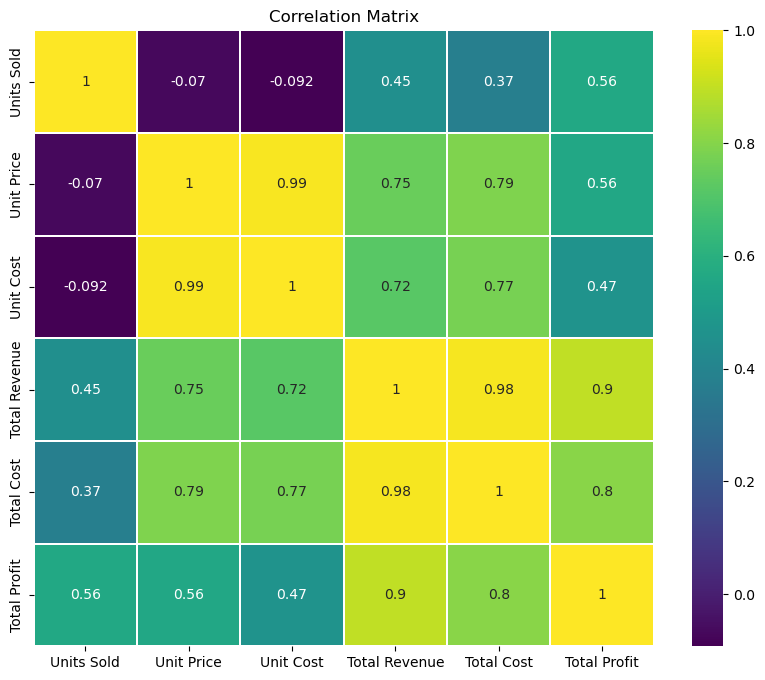

In [26]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.02)
plt.title('Correlation Matrix')
plt.show()


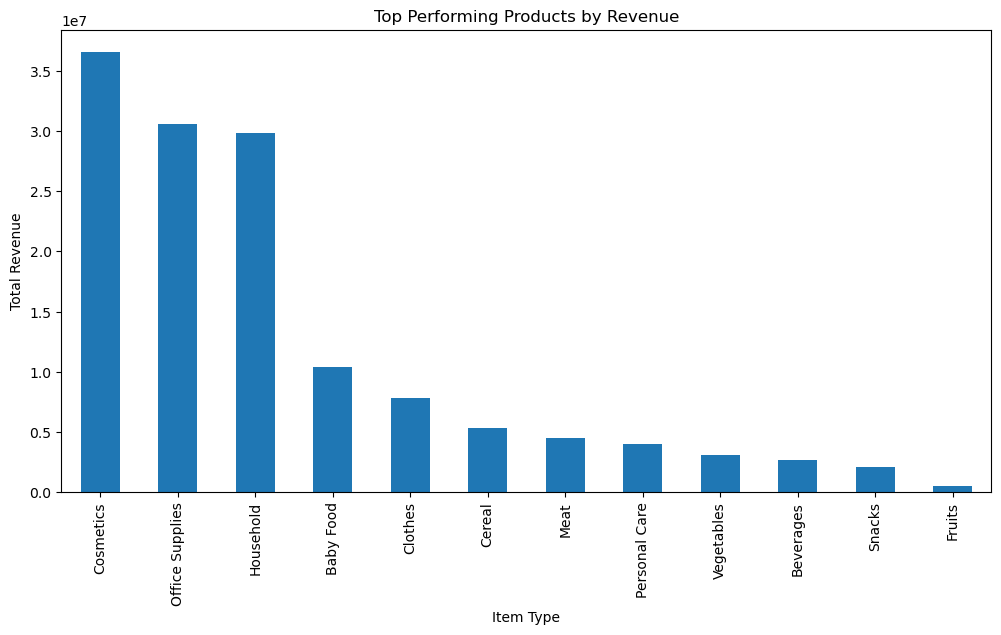

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64


In [27]:
# Top performing products
top_products = sales_df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top Performing Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Item Type')
plt.show()

print(sales_df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False))

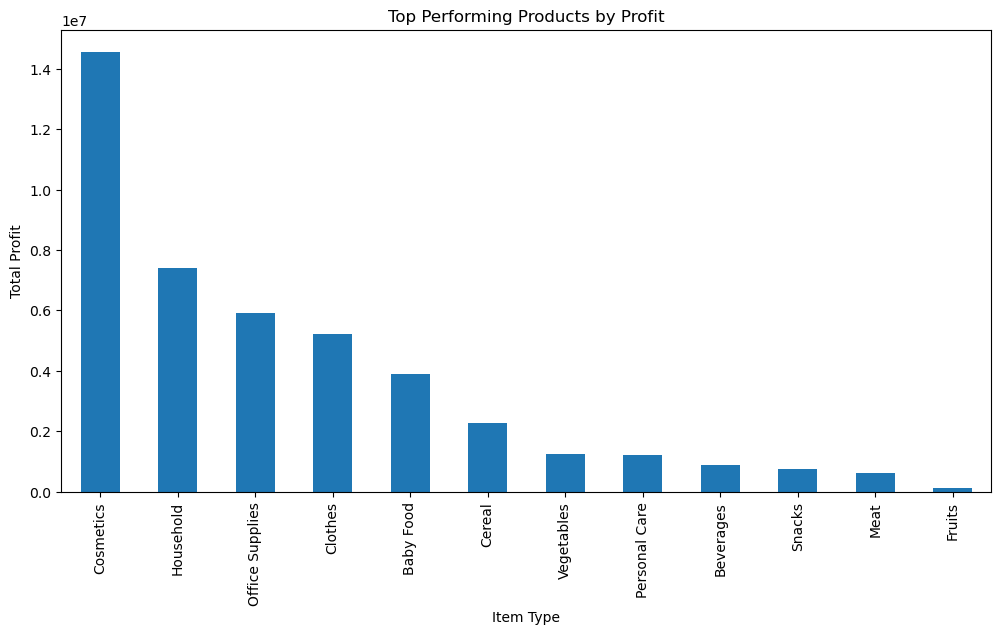

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64


In [28]:
# Top performing products
top_products = sales_df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top Performing Products by Profit')
plt.ylabel('Total Profit')
plt.xlabel('Item Type')
plt.show()


print(sales_df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False))

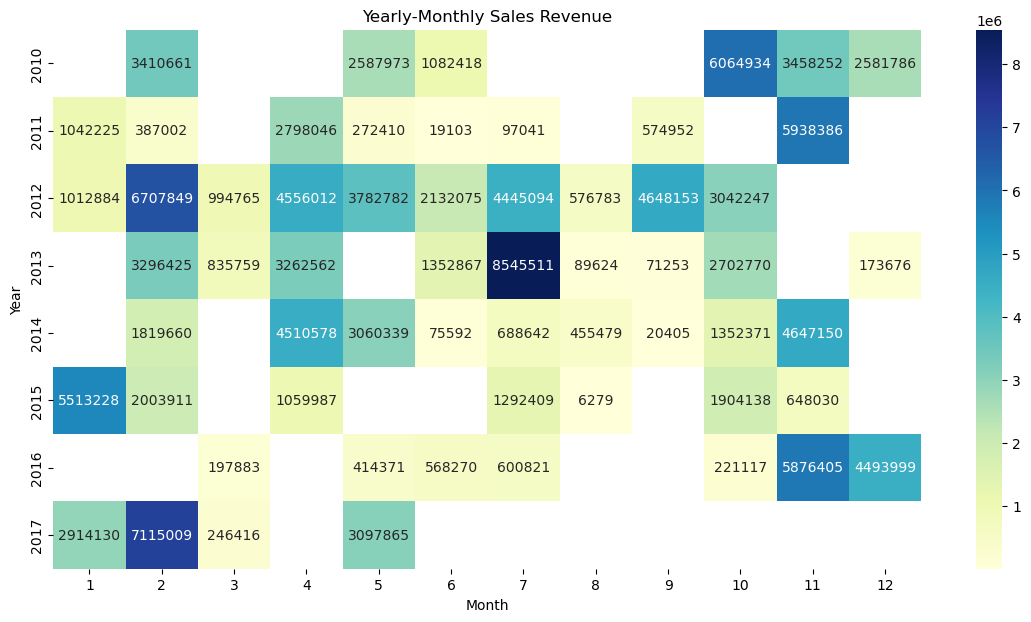

In [29]:
plt.figure(figsize=(14, 7))
yearly_monthly_sales = sales_df.groupby(['Sales Year', 'Sales Month'])['Total Revenue'].sum().unstack()
sns.heatmap(yearly_monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Yearly-Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


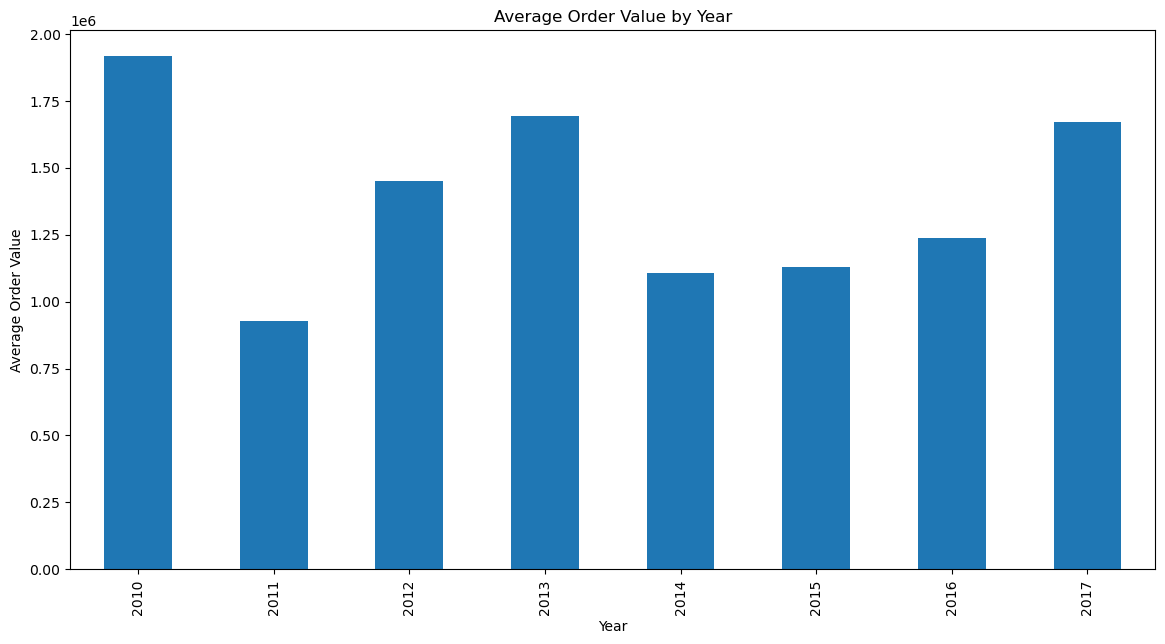

Sales Year
2010    1.918602e+06
2013    1.694204e+06
2017    1.671677e+06
2012    1.449938e+06
2016    1.237287e+06
2015    1.129817e+06
2014    1.108681e+06
2011    9.274305e+05
Name: Total Revenue, dtype: float64


In [30]:
# Average Order Value
avg_order_value = sales_df.groupby('Sales Year')['Total Revenue'].mean()
plt.figure(figsize=(14, 7))
avg_order_value.plot(kind='bar')
plt.title('Average Order Value by Year')
plt.ylabel('Average Order Value')
plt.xlabel('Year')
plt.show()


print(sales_df.groupby('Sales Year')['Total Revenue'].mean().sort_values(ascending = False))

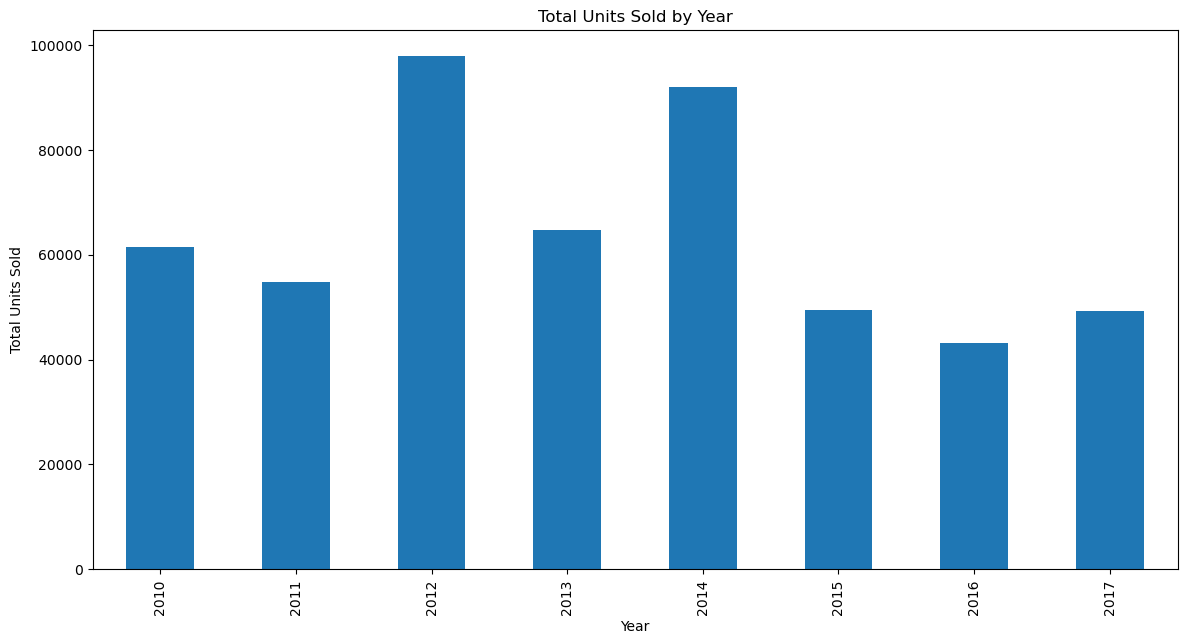

Sales Year
2012    97967
2014    92040
2013    64663
2010    61571
2011    54768
2015    49480
2017    49226
2016    43156
Name: Units Sold, dtype: int64


In [31]:
# Total Units Sold per Year
total_units_sold = sales_df.groupby('Sales Year')['Units Sold'].sum()
plt.figure(figsize=(14, 7))
total_units_sold.plot(kind='bar')
plt.title('Total Units Sold by Year')
plt.ylabel('Total Units Sold')
plt.xlabel('Year')
plt.show()


print(sales_df.groupby('Sales Year')['Units Sold'].sum().sort_values(ascending=False))

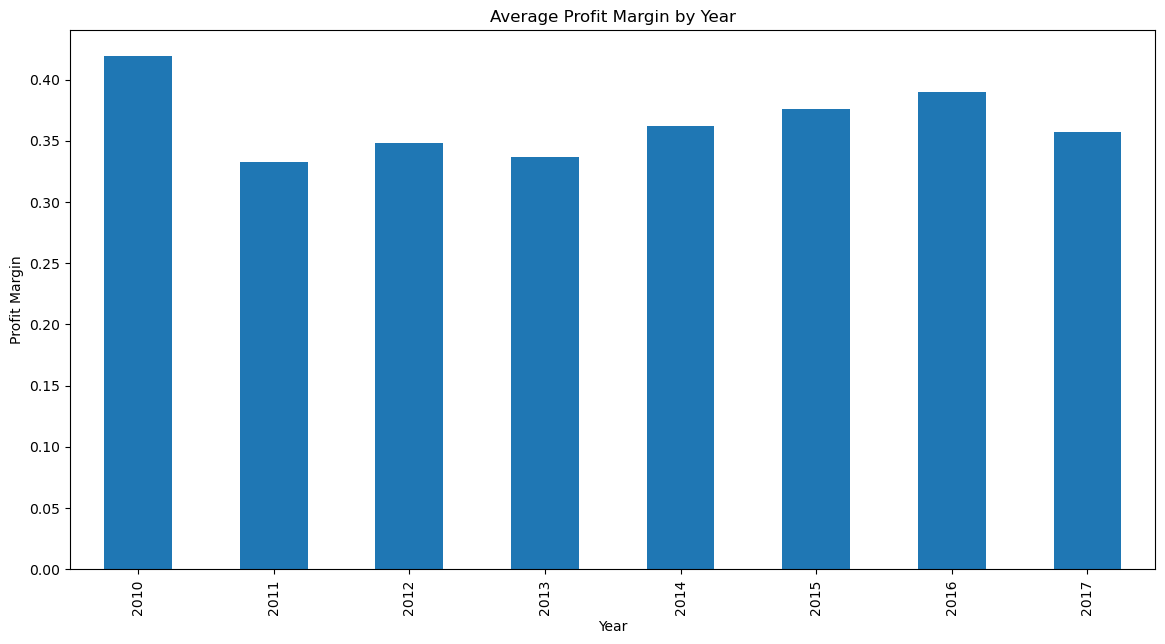

Sales Year
2010    0.419379
2016    0.389746
2015    0.376020
2014    0.362464
2017    0.357325
2012    0.347936
2013    0.336549
2011    0.332951
Name: Profit Margin, dtype: float64


In [32]:
# Average Profit Margin
sales_df['Profit Margin'] = sales_df['Total Profit'] / sales_df['Total Revenue']
avg_profit_margin = sales_df.groupby('Sales Year')['Profit Margin'].mean()
plt.figure(figsize=(14, 7))
avg_profit_margin.plot(kind='bar')
plt.title('Average Profit Margin by Year')
plt.ylabel('Profit Margin')
plt.xlabel('Year')
plt.show()


print(sales_df.groupby('Sales Year')['Profit Margin'].mean().sort_values(ascending = False))

<Figure size 1400x700 with 0 Axes>

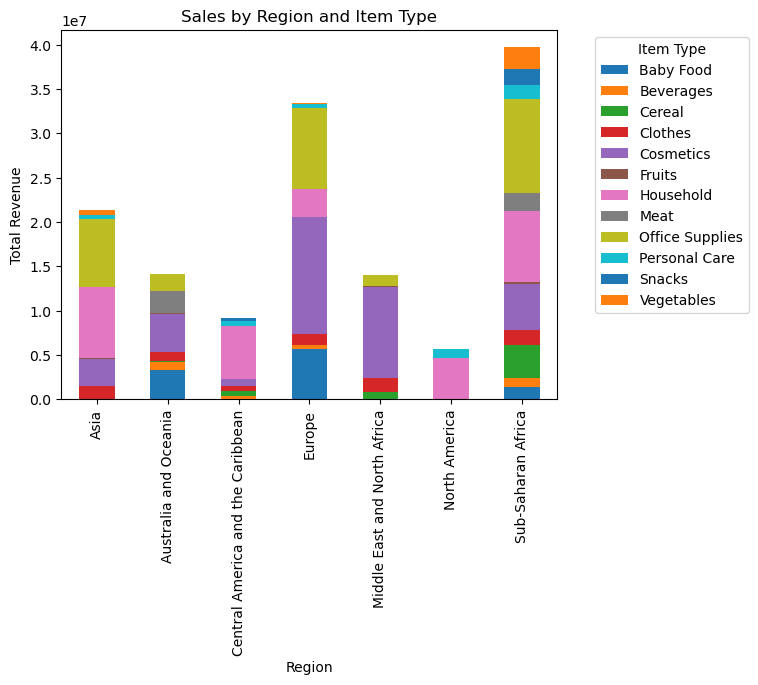

Region                             Item Type      
Asia                               Clothes             1551011.04
                                   Cosmetics           3039414.40
                                   Fruits                58471.11
                                   Household           8072701.60
                                   Office Supplies     7630878.78
                                   Personal Care        400558.73
                                   Vegetables           594055.36
Australia and Oceania              Baby Food           3292856.72
                                   Beverages            890541.60
                                   Cereal               140287.40
                                   Clothes             1082418.40
                                   Cosmetics           4220728.80
                                   Fruits                70768.05
                                   Meat                2492526.12
                         

In [33]:
# Sales by Region and Item Type
plt.figure(figsize=(14, 7))
sales_by_region_item = sales_df.groupby(['Region', 'Item Type'])['Total Revenue'].sum().unstack()
sales_by_region_item.plot(kind='bar', stacked=True)
plt.title('Sales by Region and Item Type')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.legend(title='Item Type', loc='upper right', bbox_to_anchor=(1.40, 1))
plt.show()


print(sales_df.groupby(['Region', 'Item Type'])['Total Revenue'].sum())

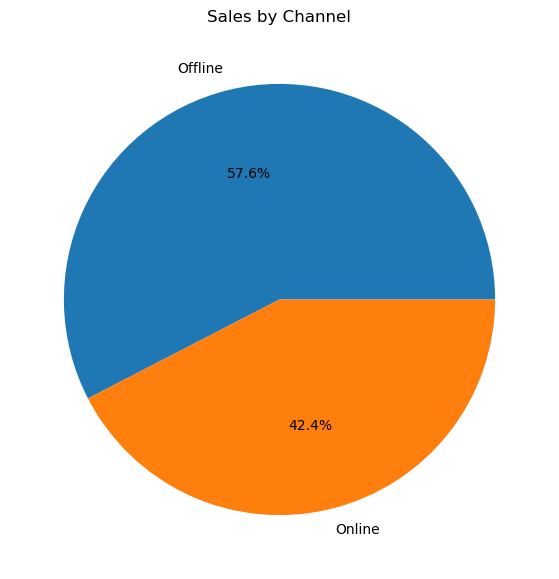

In [34]:
# Sales Channel Impact
plt.figure(figsize=(14, 7))
sales_channel_impact = sales_df.groupby('Sales Channel')['Total Revenue'].sum()
sales_channel_impact.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Channel')
plt.ylabel('')
plt.show()



# Report: Analyzing Amazon Sales Data

## Objective

The objective of this project is to analyze Amazon sales data to understand sales trends, identify key metrics, and uncover meaningful relationships between attributes. This analysis aims to improve sales management, reduce costs, and increase profits in a competitive market environment.

## Data Overview

The dataset consists of 100 entries with 14 columns, including:

* **Region**: Geographical region where sales were made.
* **Country**: Country of the sale.
* **Item Type**: Type of item sold (e.g., Electronics, Clothing).
* **Sales Channel**: Channel through which the sale was made (Online, Offline).
* **Order Priority**: Priority level of the order (High, Medium, Low, Critical).
* **Order Date**: Date of the order.
* **Order ID**: Unique identifier for the order.
* **Ship Date**: Date when the order was shipped.
* **Units Sold**: Number of units sold.
* **Unit Price**: Price per unit.
* **Unit Cost**: Cost per unit.
* **Total Revenue**: Total revenue from the sale.
* **Total Cost**: Total cost incurred for the sale.
* **Total Profit**: Total profit from the sale.

### Data Cleaning and Preparation

* The dataset has no null values.
* Data types for `Order Date` and `Ship Date` were converted to datetime format.
* The `Order Priority` column values were updated to full forms: Critical, High, Medium, Low.
* The `Order ID` column was dropped as it contained only unique identifiers.
* No duplicate rows were found.
* Spelling in country names was verified and found correct.

## Data Summary

### Sales by Region

* **Sub-Saharan Africa** has the highest number of sales.
* **North America** has the lowest number of sales.

### Sales by Country

* Sales distribution is very varied, with countries like **The Gambia**, **Sierra Leone**, and **Mexico** having the most entries.
* There are a total of 76 unique countries.

### Sales by Item Type

* The most frequently sold items are **Clothes** and **Cosmetics**.
* **Meat** and **Snacks** are the least sold items.

### Sales by Channel

* Sales are evenly split between **Online** and **Offline** channels.

## Numeric Data Analysis

### Summary Statistics

* **Units Sold**: Mean of 5128.71, ranging from 124 to 9925.
* **Unit Price**: Mean of 276.76, with a minimum of 9.33 and a maximum of 668.27.
* **Total Revenue**: Mean of 1,373,488, with a maximum of 5,997,055.
* **Total Profit**: Mean of 441,682, with a maximum of 1,719,922.

### Outliers

* Two significant outliers were identified:
  * **Honduras** with high total revenue and profit.
  * **Lithuania** with high total revenue and profit.
* These outliers are deemed relevant and should be retained in the dataset.

## Temporal Analysis

### Sales Over Time

* **Yearly Sales Revenue**: Highest in **2012** and lowest in **2017**.
* **Monthly Sales Revenue**: Highest in **February**, followed by **November** and **April**.

### Sales Year and Month Correlation

* The heatmap of yearly-monthly sales revenue shows variations in revenue across different months and years.

## Key Metrics

### Top Performing Products

* By **Revenue**: **Cosmetics**, **Office Supplies**, and **Household** items are the top performers.
* By **Profit**: **Cosmetics**, **Household**, and **Office Supplies** items have the highest profits.

### Average Order Value and Units Sold

* **Average Order Value**: Highest in **2010** and lowest in **2017**.
* **Total Units Sold**: Highest in **2012** and lowest in **2016**.

### Profit Margin

* Average profit margin is highest in **2010** and lowest in **2017**.

## Visualizations

* **Sales by Region**: Bar chart showing distribution of sales across different regions.
* **Sales by Country**: Bar chart and pie chart detailing sales distribution by country.
* **Sales by Item Type**: Histogram and bar chart showing the distribution of different item types.
* **Sales by Channel**: Pie chart showing the split between online and offline sales.
* **Yearly and Monthly Sales Revenue**: Line plots showing trends in revenue over years and months.
* **Correlation Matrix**: Heatmap showing correlations between numeric variables.
* **Top Performing Products**: Bar charts illustrating products by revenue and profit.
* **Yearly-Monthly Sales Revenue**: Heatmap visualizing revenue across years and months.
